In [3]:
from config_figures import *

In [95]:
df = pd.read_csv(google_drive_path + '/sdm_stats_validation.csv').drop(['.geo'], axis=1).rename(columns = {'system:index': 'species'}).sort_values('nobs', ascending=False)
df['Number of occurrences'] = pd.cut(df['nobs'], bins=[0, 90, 10000])
df

,species,auc,f1,nobs,npa,precision,prevalence,recall,threshold,tss,Number of occurrences
19150,Quercus_nigra,0.963269,0.943622,10000.0,10000.0,0.905502,0.500000,0.985109,0.474747,0.882417,"(90, 10000]"
17234,Picea_abies,0.959332,0.917980,10000.0,10000.0,0.872929,0.500000,0.967965,0.484848,0.827291,"(90, 10000]"
17442,Pinus_strobus,0.972258,0.937016,10000.0,9917.0,0.910082,0.502084,0.965636,0.535354,0.869569,"(90, 10000]"
17443,Pinus_sylvestris,0.973223,0.944125,10000.0,9956.0,0.920544,0.501102,0.968951,0.575758,0.884808,"(90, 10000]"
580,Acer_platanoides,0.972122,0.937584,10000.0,10000.0,0.913158,0.500000,0.963383,0.545455,0.871766,"(90, 10000]"
...,...,...,...,...,...,...,...,...,...,...,...
7138,Dimorphanthera_macbainii,0.696231,0.121316,20.0,5000.0,0.073856,0.003984,0.407407,0.010101,0.388752,"(0, 90]"
7139,Dimorphanthera_robbinsii,0.775575,0.197736,20.0,5000.0,0.122774,0.003984,0.563889,0.010101,0.546764,"(0, 90]"
18634,Psidium_robustum,0.843815,0.387085,20.0,5000.0,0.279441,0.003984,0.692593,0.010101,0.684620,"(0, 90]"
12418,Lacmellea_standleyi,0.548554,0.095238,20.0,5000.0,0.092593,0.003984,0.108333,0.030303,0.103822,"(0, 90]"


In [171]:
df_melt = pd.melt(df, id_vars=['species', 'nobs', 'Number of occurrences'] , value_vars=['tss','precision','recall','f1'], var_name='metric')
df_melt

,species,nobs,Number of occurrences,metric,value
0,Quercus_nigra,10000.0,"(90, 10000]",tss,0.882417
1,Picea_abies,10000.0,"(90, 10000]",tss,0.827291
2,Pinus_strobus,10000.0,"(90, 10000]",tss,0.869569
3,Pinus_sylvestris,10000.0,"(90, 10000]",tss,0.884808
4,Acer_platanoides,10000.0,"(90, 10000]",tss,0.871766
...,...,...,...,...,...
96555,Dimorphanthera_macbainii,20.0,"(0, 90]",f1,0.121316
96556,Dimorphanthera_robbinsii,20.0,"(0, 90]",f1,0.197736
96557,Psidium_robustum,20.0,"(0, 90]",f1,0.387085
96558,Lacmellea_standleyi,20.0,"(0, 90]",f1,0.095238


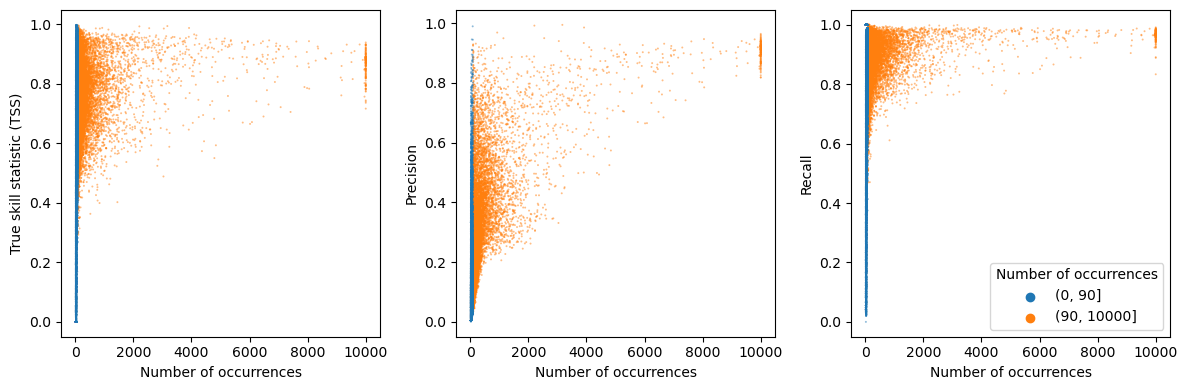

In [97]:
s = 2
alpha = 0.5

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))
sns.scatterplot(ax=ax1, data=df, x='nobs', y='tss', hue='Number of occurrences', s=s, alpha=alpha, edgecolor="none", legend=False)
ax1.set(xlabel='Number of occurrences', ylabel='True skill statistic (TSS)')

sns.scatterplot(ax=ax2, data=df, x='nobs', y='precision', hue='Number of occurrences', s=s, alpha=alpha, edgecolor="none", legend=False)
ax2.set(xlabel='Number of occurrences', ylabel='Precision')

sns.scatterplot(ax=ax3, data=df, x='nobs', y='recall', hue='Number of occurrences', s=s, alpha=alpha, edgecolor="none")
ax3.set(xlabel='Number of occurrences', ylabel='Recall')

plt.tight_layout()
# plt.savefig('../figures/nobs_tss_precision_recall.png') 

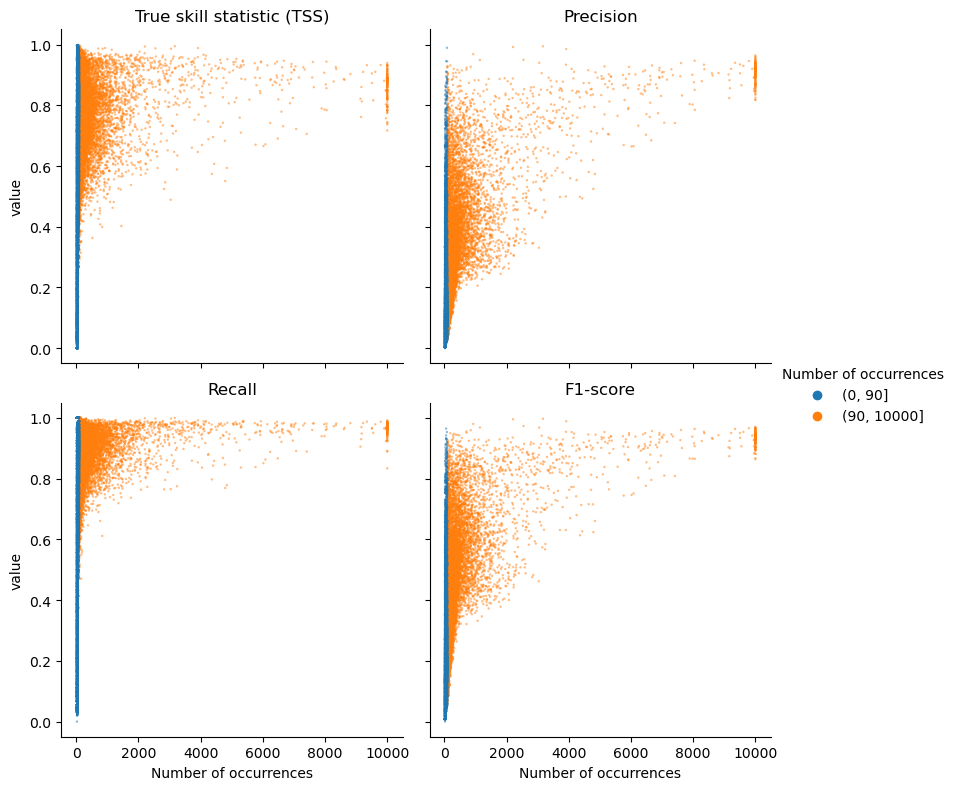

In [184]:
g = sns.relplot(df_melt, x='nobs', y='value', hue='Number of occurrences', col='metric', s=3, alpha=0.5, edgecolor="none", height=4, col_wrap=2)
# g.set_titles(col_template="{col_name}")
g.set(xlabel='Number of occurrences')
g.axes[0].set_title('True skill statistic (TSS)')
g.axes[1].set_title('Precision')
g.axes[2].set_title('Recall')
g.axes[3].set_title('F1-score')
plt.savefig('../figures/nobs_tss_precision_recall.png') 

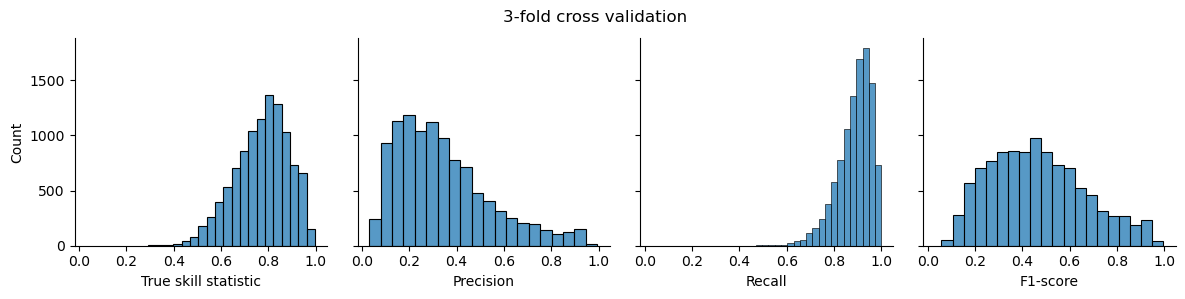

In [178]:
g = sns.FacetGrid(df_melt[df_melt['nobs'] > 90], col="metric")
g.map(sns.histplot, 'value', bins = 20)
g.set_titles(col_template="")
g.axes[0,0].set_xlabel('True skill statistic')
g.axes[0,1].set_xlabel('Precision')
g.axes[0,2].set_xlabel('Recall')
g.axes[0,3].set_xlabel('F1-score')
g.fig.suptitle('3-fold cross validation')
plt.savefig('../figures/tss_precision_recall.png')

In [102]:
df_splot = pd.read_csv(google_drive_path + '/sdm_splot_comparison.csv').drop(['system:index', '.geo'], axis=1)
df_splot['tss'] = (df_splot['tp'] / (df_splot['tp'] + df_splot['fn'])) + (df_splot['tn'] / (df_splot['tn'] + df_splot['fp'])) - 1
df_splot['precision'] = df_splot['tp'] / (df_splot['tp'] + df_splot['fp'])
df_splot['recall'] = df_splot['tp'] / (df_splot['tp'] + df_splot['fn'])
df_splot['f1'] = (2 * df_splot['precision'] * df_splot['recall']) / (df_splot['precision'] + df_splot['recall'])
df_splot

,fn,fp,species,tn,tp,tss,precision,recall,f1
0,3,307,Abarema_barbouriana,953,0,-0.243651,0.000000,0.000000,NaN
1,3,252,Abarema_jupunba,2651,3,0.413193,0.011765,0.500000,0.022989
2,4,141,Abarema_laeta,836,1,0.055681,0.007042,0.200000,0.013605
3,0,1153,Abarema_langsdorffii,697,63,0.376757,0.051809,1.000000,0.098514
4,117,13214,Abies_alba,14342,1845,0.460834,0.122518,0.940367,0.216791
...,...,...,...,...,...,...,...,...,...
5934,7,186,Ziziphus_spina-christi,4634,5,0.378077,0.026178,0.416667,0.049261
5935,0,969,Zollernia_ilicifolia,876,97,0.474797,0.090994,1.000000,0.166810
5936,0,48,Zuelania_guidonia,5148,0,NaN,0.000000,NaN,NaN
5937,0,496,Zygia_coccinea,531,1,0.517040,0.002012,1.000000,0.004016


In [174]:
df_splot_melt = pd.melt(df_splot, id_vars='species', value_vars=['tss','precision','recall','f1'], var_name='metric')
df_splot_melt['which'] = 'splot_comparison'
df_splot_melt

,species,metric,value,which
0,Abarema_barbouriana,tss,-0.243651,splot_comparison
1,Abarema_jupunba,tss,0.413193,splot_comparison
2,Abarema_laeta,tss,0.055681,splot_comparison
3,Abarema_langsdorffii,tss,0.376757,splot_comparison
4,Abies_alba,tss,0.460834,splot_comparison
...,...,...,...,...
23751,Ziziphus_spina-christi,f1,0.049261,splot_comparison
23752,Zollernia_ilicifolia,f1,0.166810,splot_comparison
23753,Zuelania_guidonia,f1,NaN,splot_comparison
23754,Zygia_coccinea,f1,0.004016,splot_comparison


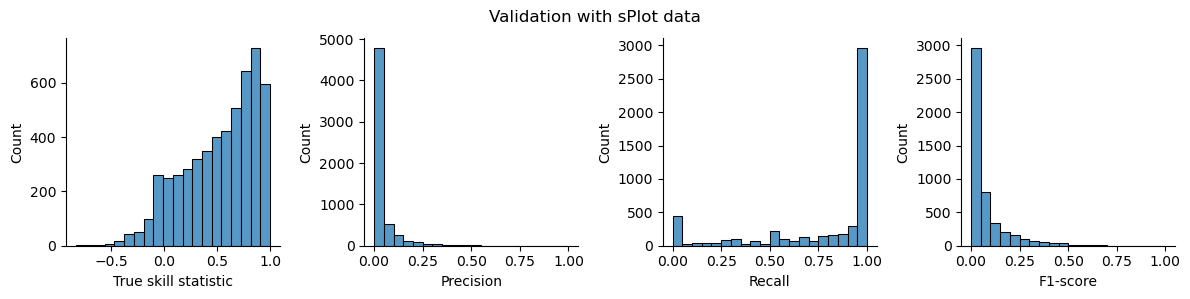

In [181]:
g = sns.FacetGrid(df_splot_melt, col="metric", sharex=False, sharey=False)
g.map(sns.histplot, 'value', bins = 20)
g.set_titles(col_template="")
g.axes[0,0].set_xlabel('True skill statistic')
g.axes[0,1].set_xlabel('Precision')
g.axes[0,2].set_xlabel('Recall')
g.axes[0,3].set_xlabel('F1-score')
g.fig.suptitle('Validation with sPlot data')
plt.savefig('../figures/splot_tss_precision_recall.png')